# 2.1 Ausgangspunkt: Daten

Daten werden typischerweise in Tabellen organisiert.
- Jede Zeile entspricht einem Datensatz ("Sample")
- Jede Spalte bezieht sich auf eine Eigenschaft ("Feature")

Damit werden die Daten beschrieben durch eine Matrix ``X`` (die sog. *Design Matrix* oder auch *Features Matrix*) mit ``n_samples`` Zeilen und ``n_features`` Spalten.
Diese wird häufig als Pandas `DataFrame` gehalten.

Neben den Features brauchen wir noch die sog. *Lables* oder *Targets* `y`, also das, was aus den Features erkannt werden soll. Dies ist ein Vektor, der `n_samples` Einträge hat.

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Aus so einem praktischen `DataFrame` können die Features Matrix `X` und den Labelsvektor `y` bei Bedarf leicht extrahiert werden:

In [6]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [7]:
y_iris = iris['species']
y_iris.shape

(150,)

## Visualisierung der Daten
Der allererste Schritt beim Arbeiten mit jeglichen Daten ist es, sich einen Überblick über die Daten zu verschaffen. Beschreibende Statistiken sind hier oft ein erster Anhaltspunkt, viel besser (Gründe siehe unten) sind aber grafische Darstellungen. Allerdings können nur niedrig-dimensionale Daten (direkt) grafisch dargestellt werden.

Im vorliegenden Fall handelt es sich um vierdimensionale Features zzgl. eindimensionale Labels. *Wie* können diese "5d-Daten" dargestellt werden?

Mögliche Lösung: Plotte alles gegen alles

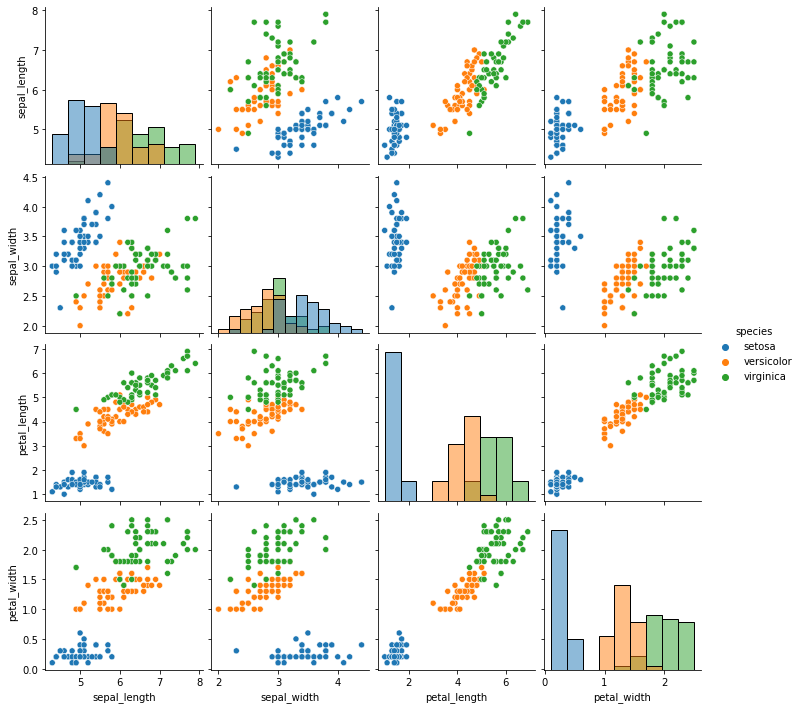

In [2]:
%matplotlib inline
#import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', diag_kind='hist', height=2.5);

## Beschreibende Statistiken
Unter einer *beschreibenden Statistik* versteht man gewisse *Kennzahlen* eines Datensatzes, die dessen charakteristische Eigenschaften zum Ausdruck bringen sollen. Solche Kennzahlen sind insbesondere
- Mittelwert
- Varianz
- Korrelation.

Jede dieser Kennzahlen gibt stets nur eine Eigenschaft des gesamten Datensatzes an, es wird also immer stark vereinfacht. **Daher ist Vorsicht geboten!**

Das sog. Anscombe-Quartett verdeutlicht dies:

In [1]:
import numpy as np

In [2]:
x1 = [4,5,6,7,8,9,10,11,12,13,14]
y1 = [4.26, 5.68, 7.24, 4.82, 6.95, 8.81, 8.04, 8.33, 10.84, 7.58, 9.96]

x2 = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
y2 = [3.1, 4.74, 6.13, 7.26, 8.14, 8.77, 9.14, 9.26, 9.13, 8.74, 8.1]

x3 = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
y3 = [5.39, 5.73, 6.08, 6.42, 6.77, 7.11, 7.46, 7.81, 8.15, 12.74, 8.84]

x4 = [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 19]
y4 = [5.25, 5.56, 5.76, 6.58, 6.89, 7.04, 7.71, 7.91, 8.47, 8.84, 12.5]

In [13]:
np.mean([x1, x2, x3], axis=1)

array([9., 9., 9.])

In [15]:
np.var([x1, x2, x3], axis=1)

array([10., 10., 10.])

In [14]:
np.mean([y1, y2, y3], axis=1)

array([7.50090909, 7.50090909, 7.5       ])

In [16]:
np.var([y1, y2, y3], axis=1)

array([3.75206281, 3.75239008, 3.74783636])

In [20]:
np.corrcoef(x1,y1), np.corrcoef(x2,y2), np.corrcoef(x3,y3)

(array([[1.        , 0.81642052],
        [0.81642052, 1.        ]]),
 array([[1.        , 0.81623651],
        [0.81623651, 1.        ]]),
 array([[1.        , 0.81628674],
        [0.81628674, 1.        ]]))

In [49]:
p1 = np.polyfit(x1, y1, 1)
p2 = np.polyfit(x2, y2, 1)
p3 = np.polyfit(x3, y3, 1)
p4 = np.polyfit(x4, y4, 1)

In [36]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Datensatz 4')

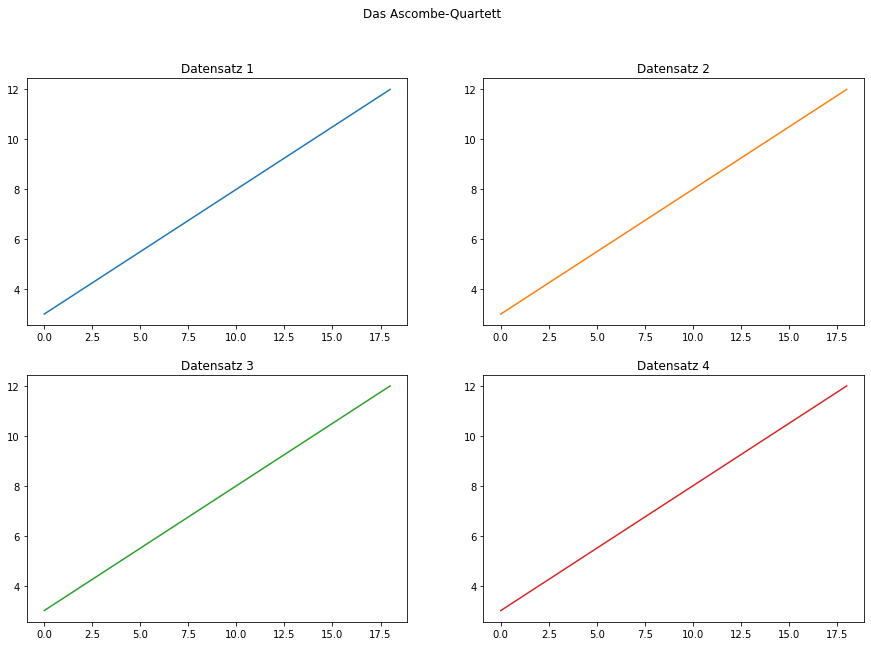

In [63]:
xs = np.linspace(0, 18, 1000)

fig, axs = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('Das Ascombe-Quartett')
axs[0,0].plot(xs, p1[1]+p1[0]*xs)
axs[0,1].plot(xs, p2[1]+p2[0]*xs, 'tab:orange')
axs[1,0].plot(xs, p3[1]+p3[0]*xs, 'tab:green')
axs[1,1].plot(xs, p4[1]+p4[0]*xs, 'tab:red')

axs[0,0].set_title('Datensatz 1')
axs[0,1].set_title('Datensatz 2')
axs[1,0].set_title('Datensatz 3')
axs[1,1].set_title('Datensatz 4')

# axs[0,0].scatter(x1,y1)
# axs[0,1].scatter(x2,y2)
# axs[1,0].scatter(x3,y3)
# axs[1,1].scatter(x4,y4)